### Considering the column_diagnosis.arff dataset available at the course webpage’s homework tab. Using sklearn, apply a 10-fold stratified cross-validation with shuffling (random_state=0) for the assessment of predictive models along this section.

### 1) [3v] Compare the performance of 𝑘NN with 𝑘 = 5 and naïve Bayes with Gaussian assumption (consider all remaining parameters for each classifier as sklearn’s default):

### a. Plot two boxplots with the fold accuracies for each classifier.

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold

from scipy.io.arff import loadarff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']
print

# kNN
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y)

# Bayesian
gnb = GaussianNB()
gnb.fit(X, y)


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Cross-validation for kNN
knn_scores = cross_val_score(neigh, X, y, cv=cv)

# Cross-validation for Gaussian Naive Bayes
gnb_scores = cross_val_score(gnb, X, y, cv=cv)


# Boxplot 
data = pd.DataFrame({
    'label1': "Knn",
    'knn_scores': knn_scores,
    'label2': "Gnb",
    'gnb_scores': gnb_scores
})

sns.boxplot(data=data)

# Show the plot
plt.show()

NameError: name 'Y' is not defined

### b. Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding accuracy”, asserting whether is true.

### 2) [2.5v] Consider two 𝑘NN predictors with 𝑘 = 1 and 𝑘 = 5 (uniform weights, Euclidean distance, all remaining parameters as default). Plot the differences between the two cumulative confusion matrices of the predictors. Comment.

Confusion Matrix for KNN (k=1):
[[ 60   0   0]
 [  0 100   0]
 [  0   0 150]]

Confusion Matrix for KNN (k=5):
[[ 45  15   0]
 [ 12  85   3]
 [  2   3 145]]


<AxesSubplot:>

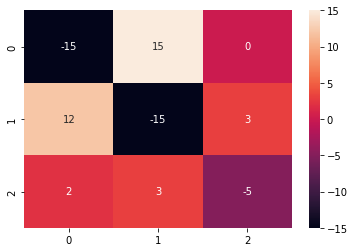

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Create and fit a KNN model with k=1
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn1.fit(X, y)

knn1_pred = knn1.predict(X)

# Create and fit a KNN model with k=5
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric="euclidean")
knn5.fit(X, y)
knn5_pred = knn5.predict(X)

# TODO: Idk how to use it
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Calculate confusion matrices for both models
confusion_matrix_knn1 = confusion_matrix(y, knn1_pred)
confusion_matrix_knn5 = confusion_matrix(y, knn5_pred)

print("Confusion Matrix for KNN (k=1):")
print(confusion_matrix_knn1)

print("\nConfusion Matrix for KNN (k=5):")
print(confusion_matrix_knn5)

sns.heatmap(confusion_matrix_knn5 - confusion_matrix_knn1, annot=True, fmt='g')

### 3) [1.5v] Considering the unique properties of column_diagnosis, identify three possible difficulties of naïve Bayes when learning from the given dataset.